# SCHOOL PERFORMANCE PROJECT:
According to an article published in Education.org the American federal and local governments spend upwards of $640billion per year on K-12 education. In 2021, America spent an average of $12,000 per pupil making the USA 5th in the world for per pupil cost. Despite the high spending per pupil, as of 2015 the USA ranked 34th out of 37 of OECD's developed countries in math and other subjects (pewdsresearch).

There have been over 700 bills brought to the senate floor reguarding eduacation since 2019 (GovTrack). Education improvement is and will continue to be a mainstream issue in the United States. While both political parties agreee something needs to be done, the best course of action to improve our education system remains in doubt.  

Money spent on eductation has always been an intense topic in politics and in the media. The intial focus of this project is to try to gain insight on the effects of money on school performance in the USA.
## GOAL:
What is the realtionship between expediture and school performance in the USA?

In [4]:
# ENVIRONMENT SET UP:

In [5]:
import pandas as pd
import numpy as np
from  sqlalchemy import create_engine
import warnings 
import seaborn as sns
import scipy.stats as stats
import getpass

# Data
The data was obtained from private datebase using SQL. 
## Processing 
The intial dataframe contained 510 rows of data and 17 columns.
After droping null values  the final data set contained 415 rows and 18 columns. 
As this project progress more substatial steps will be taken to help reduce data leakage
## Distributions
THe distributions of the numerical columns were checked visualy and using the shapiro test. 
Some distributions were normals and others non-normal.


In [6]:
# Getting DATA from SQL Severs
pwd =getpass.getpass(prompt ='DB PASSWORD:')
postgres_user = 'dsbc_student'
postgres_pw = pwd 
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'department_of_education'
engine =create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
))
df = pd.read_sql_query('SELECT * FROM naep as n INNER JOIN finance as f ON n.id = f.id',
                       con = engine )
engine.dispose()


DB PASSWORD: ··········


In [7]:
df_1 = df.loc[:,~df.columns.duplicated()]

In [8]:
df_1.head()

,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score,id,state,year,capital_outlay_expenditure,enroll,federal_revenue,instruction_expenditure,local_revenue,other_expenditure,state_revenue,support_services_expenditure,total_expenditure,total_revenue
0,208.328,252.188,207.964,NaN,1992_ALABAMA,ALABAMA,1992,174053,NaN,304177,1481703,715680,NaN,1659028,735036,2653798,2678885
1,NaN,NaN,NaN,258.86,1992_ALASKA,ALASKA,1992,37451,NaN,106780,498362,222100,NaN,720711,350902,972488,1049591
2,215.254,265.366,206.213,262.17,1992_ARIZONA,ARIZONA,1992,609114,NaN,297888,1435908,1590376,NaN,1369815,1007732,3401580,3258079
3,210.206,256.312,208.634,264.62,1992_ARKANSAS,ARKANSAS,1992,145212,NaN,178571,964323,574603,NaN,958785,483488,1743022,1711959
4,208.399,260.892,196.764,NaN,1992_CALIFORNIA,CALIFORNIA,1992,2044688,NaN,2072470,14358922,7641041,NaN,16546514,8520926,27138832,26260025


In [9]:
df_1.shape


(510, 17)

In [10]:
df_1 = df_1.dropna()
print(df_1.isna().sum())
print(df_1.count())
df_1.shape

avg_math_4_score                0
avg_math_8_score                0
avg_reading_4_score             0
avg_reading_8_score             0
id                              0
state                           0
year                            0
capital_outlay_expenditure      0
enroll                          0
federal_revenue                 0
instruction_expenditure         0
local_revenue                   0
other_expenditure               0
state_revenue                   0
support_services_expenditure    0
total_expenditure               0
total_revenue                   0
dtype: int64
avg_math_4_score                415
avg_math_8_score                415
avg_reading_4_score             415
avg_reading_8_score             415
id                              415
state                           415
year                            415
capital_outlay_expenditure      415
enroll                          415
federal_revenue                 415
instruction_expenditure         415
local_revenue

(415, 17)

P_VALUE FOR COLUMN: avg_math_4_score is normal 1.0
P_VALUE FOR COLUMN: avg_math_8_score is normal 1.0
P_VALUE FOR COLUMN: avg_reading_4_score is normal 1.0
P_VALUE FOR COLUMN: avg_reading_8_score is normal 1.0
column id is nonnumerical
column state is nonnumerical
P_VALUE FOR COLUMN: year is non-normal 2.516458310693554e-21
P_VALUE FOR COLUMN: capital_outlay_expenditure is non-normal 5.8297209695291284e-33
P_VALUE FOR COLUMN: enroll is normal 1.0
P_VALUE FOR COLUMN: federal_revenue is non-normal 9.397993764522685e-34
P_VALUE FOR COLUMN: instruction_expenditure is non-normal 4.258483133028995e-31
P_VALUE FOR COLUMN: local_revenue is non-normal 1.3972659362348622e-29
P_VALUE FOR COLUMN: other_expenditure is normal 1.0
P_VALUE FOR COLUMN: state_revenue is non-normal 6.855118650746826e-32
P_VALUE FOR COLUMN: support_services_expenditure is non-normal 1.0713018417574919e-29
P_VALUE FOR COLUMN: total_expenditure is non-normal 9.605253982376954e-31
P_VALUE FOR COLUMN: total_revenue is non-nor

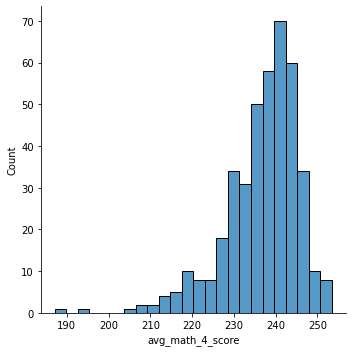

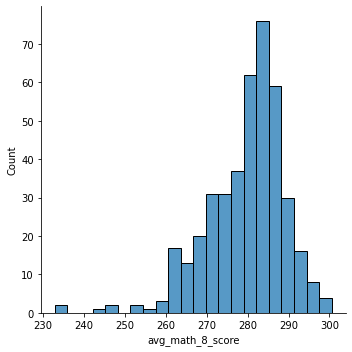

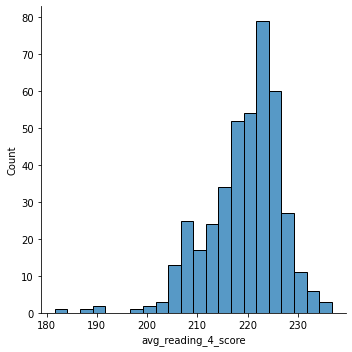

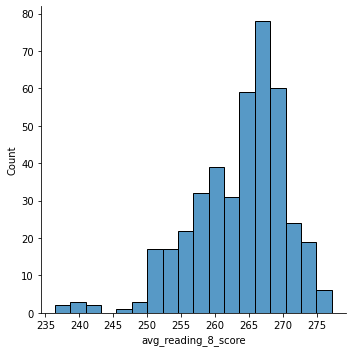

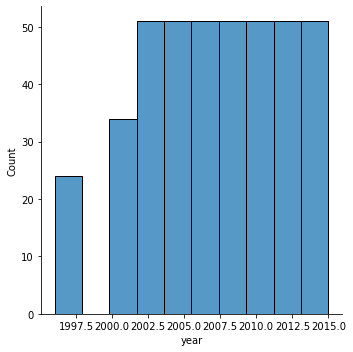

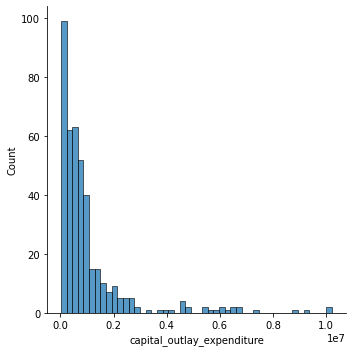

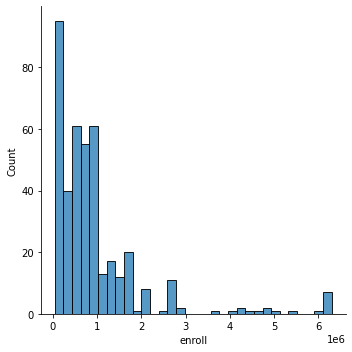

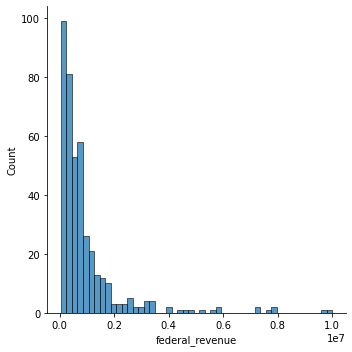

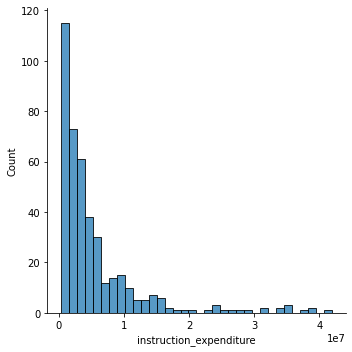

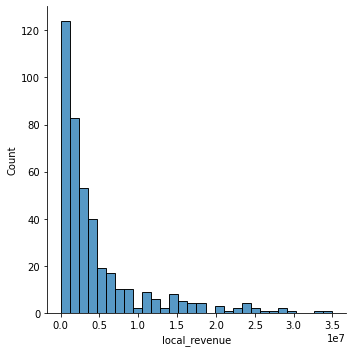

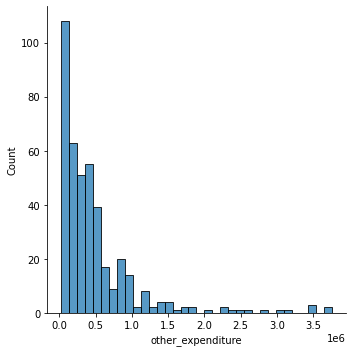

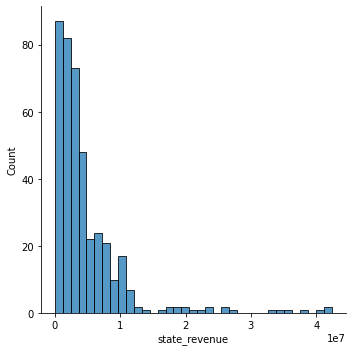

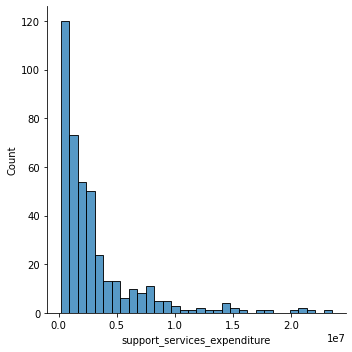

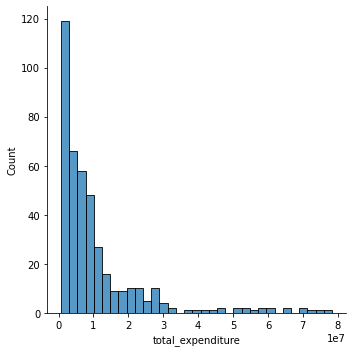

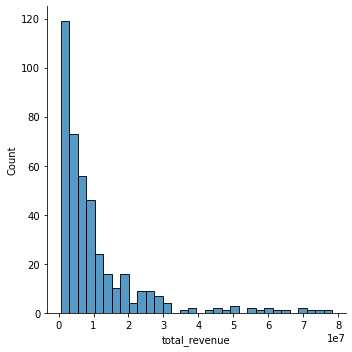

In [11]:
#Checking Distribution:
for i in df_1:
    try:
        sh = stats.shapiro(df[i])
        if sh.pvalue ==1:
            print('P_VALUE FOR COLUMN:', i,'is normal', sh.pvalue)
            sns.displot(df_1, x = i)
        else:
            print('P_VALUE FOR COLUMN:', i,'is non-normal', sh.pvalue)
            sns.displot(df_1, x = i)
    except:
        print('column', i, 'is nonnumerical')
    

In [12]:
# Creating an expendature per enrollment column
df_1['expen_per_enrollment'] = df_1['instruction_expenditure']/df_1['enroll']
df_1.head()


,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score,id,state,year,capital_outlay_expenditure,enroll,federal_revenue,instruction_expenditure,local_revenue,other_expenditure,state_revenue,support_services_expenditure,total_expenditure,total_revenue,expen_per_enrollment
51,211.647,256.595,210.921,260.276,1996_ALABAMA,ALABAMA,1996,286699,735912.0,334858,1987018,891538,322883.0,2138717,935115,3572283,3365113,2.700076
53,217.576,267.875,206.530,263.284,1996_ARIZONA,ARIZONA,1996,877190,764681.0,378917,1860007,1966024,220650.0,1798363,1193260,4391555,4143304,2.432396
54,215.846,261.653,208.838,271.835,1996_ARKANSAS,ARKANSAS,1996,203555,452907.0,192152,1264275,694985,127007.0,1296247,636106,2297381,2183384,2.791467
55,209.129,262.772,201.913,269.197,1996_CALIFORNIA,CALIFORNIA,1996,2580639,5460484.0,2603882,16880730,11617625,2362407.0,17061474,9222569,31561692,31282981,3.091435
56,225.806,275.608,221.653,268.168,1996_COLORADO,COLORADO,1996,588209,655679.0,194998,2052264,2031529,143767.0,1664676,1127563,4075165,3891203,3.129983


In [13]:
#SEPERATING dfs by state:
def split_all_states(df,st):
    return df[df['state']== st]
li = np.unique(df_1.state)
dfs_state = {state: split_all_states(df_1,state) for state in li}

## First Thoughts 
Looking at the graphs below, the USA average test score has improved as time has passed. 
At first glance it looks like the expendature per pupil has a slight postitive correlation with improved math scores

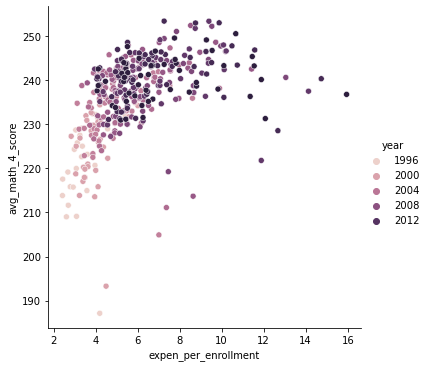

In [14]:
sns.relplot(y = 'avg_math_4_score', x = 'expen_per_enrollment', hue= 'year', data = df_1)

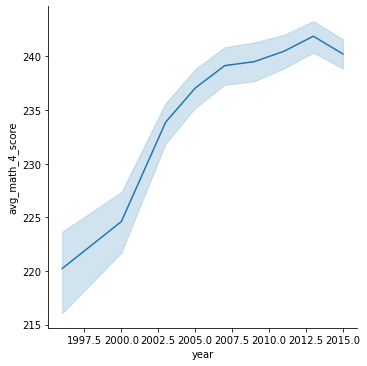

In [15]:
sns.relplot(y = 'avg_math_4_score', x = 'year',kind ='line', data = df_1)

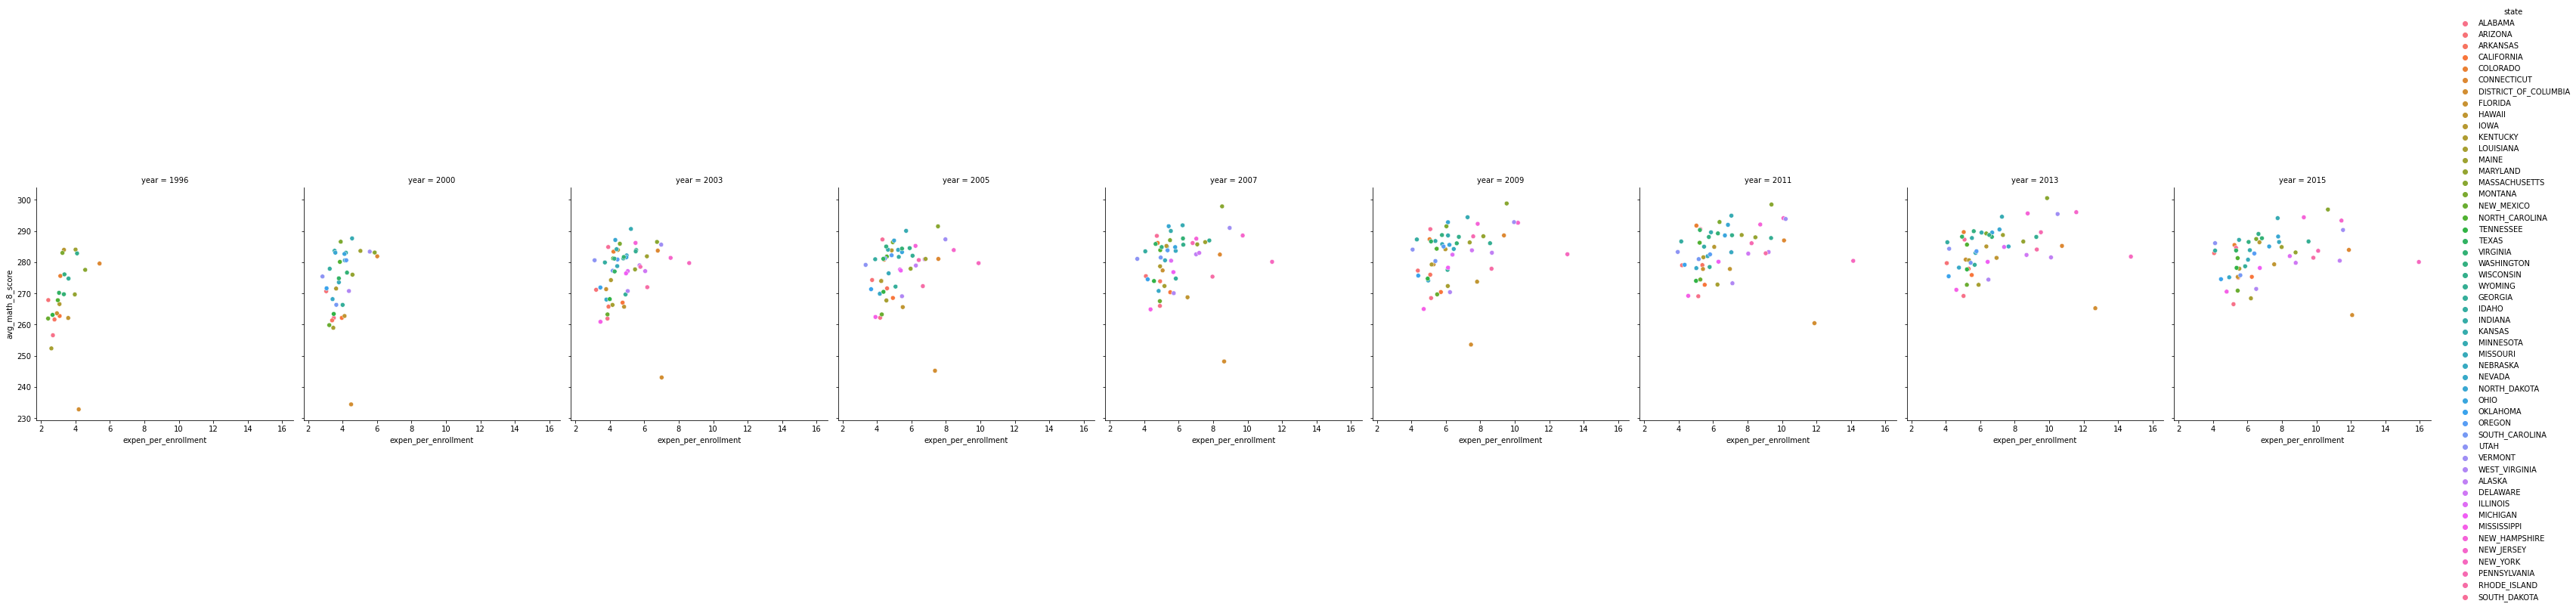

In [16]:
sns.relplot(y = 'avg_math_8_score', x = 'expen_per_enrollment', col='year',hue = 'state', data = df_1)

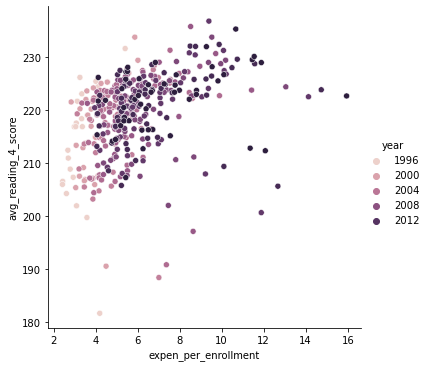

In [17]:
sns.relplot(y = 'avg_reading_4_score', x = 'expen_per_enrollment', hue = 'year', data = df_1)

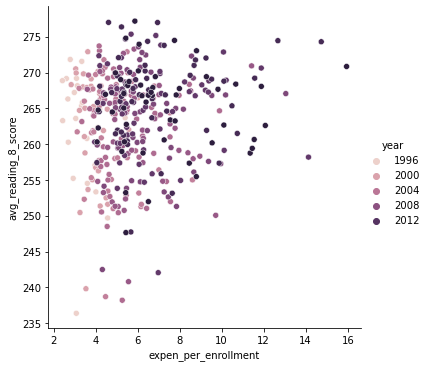

In [18]:
sns.relplot(y = 'avg_reading_8_score', x = 'expen_per_enrollment', hue = 'year', data = df_1)

In [19]:
i = 0 
y = 1
x = 0
l_state_0 = []
l_state_1 = []
l_pvalue = []
l_stats = []
l_sig = []
while i <= 50:
    y = 1 + x
    x = x + 1 
    while y<= 50:
        try:
            df_i = dfs_state[li[i]]
            df_y = dfs_state[li[y]]
            kr = stats.ttest_ind(df_i['avg_math_4_score'],df_y['avg_math_4_score'])
            l_state_0.append(li[i])
            l_state_1.append(li[y])
            l_stats.append(kr.statistic)
            l_pvalue.append(kr.pvalue)
            if kr.pvalue <= .05:
                l_sig.append(1)
            else:
                l_sig.append(0)
            
       
        except:
            print('ERROR')
        y = y+1
    i = i +1
    
    
                  
    

In [20]:
math_4_sig_df = pd.DataFrame()
math_4_sig_df['state_0']= l_state_0
math_4_sig_df['v_state']= l_state_1
math_4_sig_df['pvalue'] = l_pvalue
math_4_sig_df['stat'] = l_stats
math_4_sig_df['sig'] = l_sig




In [21]:
i = 0 
y = 1
x = 0
l_state_0 = []
l_state_1 = []
l_pvalue = []
l_stats = []
l_sig = []
while i <= 50:
    y = 1 + x
    x = x + 1 
    while y<= 50:
        try:
            df_i = dfs_state[li[i]]
            df_y = dfs_state[li[y]]
            kr = stats.ttest_ind(df_i['expen_per_enrollment'],df_y['expen_per_enrollment'])
            l_state_0.append(li[i])
            l_state_1.append(li[y])
            l_pvalue.append(kr.pvalue)
            l_stats.append(kr.statistic)
            if kr.pvalue <= .05:
                l_sig.append(1)
            else:
                l_sig.append(0)
            
       
        except:
            print('ERROR')
        y = y+1
    i = i +1
    

In [22]:
expen_enroll_sig_df = pd.DataFrame()
expen_enroll_sig_df['state_0']= l_state_0
expen_enroll_sig_df['state_1']= l_state_1
expen_enroll_sig_df['pvalue'] = l_pvalue
expen_enroll_sig_df['stat'] = l_stats
expen_enroll_sig_df['sig'] = l_sig
math_4_sig_df['expen_per_enroll_sig'] = l_sig
math_4_sig_df['expen_per_enroll_stats'] = l_stats

In [23]:
print(expen_enroll_sig_df.shape)

(1275, 5)


In [24]:
math_4_sig_df
    

,state_0,v_state,pvalue,stat,sig,expen_per_enroll_sig,expen_per_enroll_stats
0,ALABAMA,ALASKA,0.001647,-3.885882,1,1,-5.118736
1,ALABAMA,ARIZONA,0.212650,-1.298111,0,0,1.938486
2,ALABAMA,ARKANSAS,0.124697,-1.620343,0,0,-0.308531
3,ALABAMA,CALIFORNIA,0.731337,-0.349411,0,0,-1.391941
4,ALABAMA,COLORADO,0.000683,-4.261321,1,0,-0.528694
...,...,...,...,...,...,...,...
1270,WASHINGTON,WISCONSIN,0.835088,-0.212098,0,1,-2.233293
1271,WASHINGTON,WYOMING,0.837011,-0.209585,0,1,-2.877209
1272,WEST_VIRGINIA,WISCONSIN,0.002207,-3.737547,1,0,-0.512908
1273,WEST_VIRGINIA,WYOMING,0.015122,-2.767311,1,0,-1.916275


In [25]:
# WHAT ARE THE CHANCES THERE IS A STAT SIG DIFFENCE IN MATH 4 SCORE IF THERE IS A SIG DIFFERNCE IN EXPEN PER EROLLMENT 
#prob of stat sig test difference
prob_math = math_4_sig_df.sig.sum()/math_4_sig_df.sig.count()
prob_expen = math_4_sig_df.expen_per_enroll_sig.sum()/math_4_sig_df.expen_per_enroll_sig.count()
print(prob_math)
print(prob_expen)


0.4549019607843137
0.5772549019607843


In [26]:
# Probability of having both a lower budget and lower test score 
l = []
y= 0
for x in math_4_sig_df.sig:
    test = math_4_sig_df.sig[y] + math_4_sig_df.expen_per_enroll_sig[y]
    if test == 2:
        i = math_4_sig_df.stat[y]*math_4_sig_df.expen_per_enroll_stats[y]
        if i >0:
            l.append(1)
        else:
            l.append(0)
    else:
        l.append(0)
    y=y+1
math_4_sig_df['both'] = l
prob_both= math_4_sig_df.both.sum()/math_4_sig_df.both.count()
print(prob_both)

0.23215686274509803


In [27]:
# Probability of lower EXPEN given a lower test score 
l = []
y= 0
for x in math_4_sig_df.sig:
    test = math_4_sig_df.sig[y]
    if test == 1:
        t = math_4_sig_df.expen_per_enroll_sig[y]
        if t == 1:
            if  math_4_sig_df.stat[y]*math_4_sig_df.expen_per_enroll_stats[y] > 0: 
                l.append(1)
            else: 
                l.append(0)
        else: 
            l.append(0)
    else:
        l.append(0)
    y=y+1
math_4_sig_df['bga'] = l
prob_bga= math_4_sig_df['bga'].sum()/math_4_sig_df['sig'].sum()
print(prob_bga)

0.5103448275862069


In [ ]:
#PROBABILITY OF A GIVEN B
prob_agb = prob_bga*prob_math/prob_expen
print(prob_agb)
# There is a 40% chance that a state with statsistcally lower insutrctional expendatures will have statistcally lower test scores!

# Results:
- Only 40% of states with a statistically lower expendature per pupil had statistcally lower math scores
- The average math score in the US has decresed since 2012 ( see figure ?) 
- There apears to be an asymptote where increasing spending per pupil speng fails to achieve better math scores (See figure ?)

# Conclusion:
- On a state by state basis, broadly spending more money per pupil does not promise better test scores

# Recomendations: 
- Start to look at other explainations for difference in state test scores
    - Example: Average class size in the state
    - Example: Average commute distance for students in the state
    - ect
- Gather more exact data on how the educational expendature is spent
    - Example: Is there a differnce in test score in states with higher payed teachers
- Gather more data by district
    - Example: Is there difference in test scores between districs with a higher educational expendature?
- Gather more social economic data vs test score
    - Example: Is there a difference between average parent education and student test score?
- Gather worldwide data on spending 
  

# Limitations:
At this point in the study, we have only evaluated how broad education expendature affects math scores, where as there are 100s of categories educational expendature can fall under. All that can be drived from this study currently is lower'education expendature only explains 40% of the states with lower test scores. What counts as eduecation expendature is not clearly defined and may vary by state.  **A varied definition of educational expendature by state would render this study void.**

# Sources:
- https://educationdata.org/public-education-spending-statistics
- https://www.pewresearch.org/fact-tank/2017/02/15/u-s-students-internationally-math-science/
- https://www.govtrack.us/congress/bills/subjects/education/5991#congress=116
- https://www.oecd.org/about/members-and-partners/
